<a href="https://colab.research.google.com/github/sajjadsehat/Optimization-project./blob/main/damege%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##imports library

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import dataloader
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import loguniform
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##load dataset

In [ ]:
path="/content/drive/MyDrive/data set/clintox.csv"
path="/content/drive/MyDrive/data set/clintox_global_cdf_rdkit.csv"
clintox_dataset=pd.read_csv("/content/drive/MyDrive/data set/clintox.csv")
clintox_features=pd.read_csv("/content/drive/MyDrive/data set/clintox_global_cdf_rdkit.csv")

In [ ]:
clintox_dataset

,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0
...,...,...,...
1479,O[Si](=O)O,1,0
1480,O=[Ti]=O,1,0
1481,O=[Zn],1,0
1482,OCl(=O)(=O)=O,1,0


In [ ]:
clintox_features

,"('RDKit2DNormalized_calculated', <class 'bool'>)","('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,True,0.991710,0.032227,0.327468,3.240720e-01,0.272088,0.267634,2.559467e-01,0.191662,0.129463,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,9.999997e-01,0.166633,0.199925
1,True,0.959513,0.002740,0.013444,3.661088e-03,0.064943,0.007554,6.121351e-03,0.066186,0.013196,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.502204
2,True,0.997179,0.008923,0.040515,9.183597e-03,0.005843,0.015818,7.248815e-03,0.004882,0.010203,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.174273
3,True,0.876807,0.366047,0.239855,2.227413e-01,0.117241,0.208792,1.874159e-01,0.093378,0.138845,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.099056
4,True,0.357635,0.244387,0.492729,5.493576e-01,0.312107,0.484702,5.197023e-01,0.293400,0.285785,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,9.999997e-01,0.166633,0.097226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,True,0.962954,0.000888,0.000045,9.955970e-07,0.000036,0.000018,2.784370e-06,0.000639,0.000011,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.170201
1474,True,0.984555,0.000853,0.000009,2.329201e-08,0.000042,0.000006,3.536917e-07,0.000419,0.000003,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.204455
1475,True,0.752965,0.000597,0.000002,9.850139e-10,0.000320,0.000001,8.281772e-08,0.000312,0.000001,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.199795
1476,True,0.976043,0.000792,0.000173,3.243700e-06,0.000037,0.000038,2.428973e-06,0.000584,0.000022,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.162830


##clean data

In [ ]:
clintox_features=clintox_features.loc[:,clintox_features.apply(pd.Series.nunique) !=1]
clintox_features=clintox_features.dropna()
clintox_features=clintox_features.reset_index()
clintox_dataset=clintox_dataset.iloc[clintox_features.dropna().index]
clintox_dataset=clintox_dataset.reset_index()


##Count ziro and one value in clintox_dataset(labels)

In [ ]:
Count_0=clintox_dataset['CT_TOX'].value_counts()[0]
Count_1=clintox_dataset['CT_TOX'].value_counts()[1]
count_0=clintox_dataset['FDA_APPROVED'].value_counts()[0]
count_1=clintox_dataset['FDA_APPROVED'].value_counts()[1]
print('Count of zeros in Column CT_TOX : ', Count_0)
print('Count of one in Column CT_TOX',Count_1)
print('Count of zeros in Column FDA_APPROVED : ', count_0)
print('Count of one in Column FDA_APPROVED',count_1)

Count of zeros in Column CT_TOX :  1353
Count of one in Column CT_TOX 108
Count of zeros in Column FDA_APPROVED :  90
Count of one in Column FDA_APPROVED 1371


Text(0, 0.5, 'count')

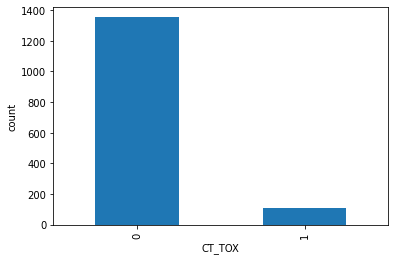

In [ ]:
clintox_dataset['CT_TOX'].value_counts().plot(kind='bar')
plt.xlabel('CT_TOX')
plt.ylabel('count')

Text(0, 0.5, 'count')

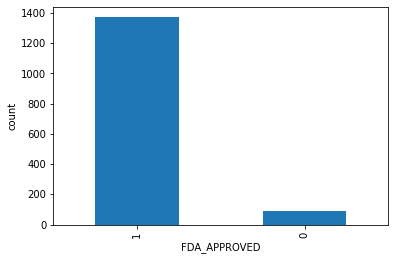

In [ ]:
clintox_dataset['FDA_APPROVED'].value_counts().plot(kind='bar')
plt.xlabel('FDA_APPROVED')
plt.ylabel('count')

##random oversampling 

In [ ]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
clintox_features, clintox_dataset['CT_TOX'] = make_classification(n_samples=1461, 
                                                        weights=[0.90],
                                                        flip_y=0)
# summarize class distribution
print(Counter(clintox_dataset['CT_TOX']))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
clintox_features_over, clintox_dataset_over = oversample.fit_resample(clintox_features
                                                                      , clintox_dataset['CT_TOX'])
# summarize class distribution
print(Counter(clintox_dataset_over))

Counter({0: 1315, 1: 146})
Counter({0: 1315, 1: 1315})


In [ ]:
# define dataset
clintox_features, clintox_dataset['FDA_APPROVED'] = make_classification(n_samples=1461, 
                                                        weights=[0.90],
                                                        flip_y=0)
# summarize class distribution
print(Counter(clintox_dataset['FDA_APPROVED']))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
clintox_features_over, clintox_dataset_over1 = oversample.fit_resample(clintox_features
                                                                      , clintox_dataset['FDA_APPROVED'])
# summarize class distribution
print(Counter(clintox_dataset_over))

Counter({0: 1315, 1: 146})
Counter({0: 1315, 1: 1315})


In [ ]:
clintox_dataset_over=pd.DataFrame(clintox_dataset_over)
clintox_dataset_over1=pd.DataFrame(clintox_dataset_over1)
frame=[clintox_dataset_over,clintox_dataset_over1]
clintox_data_over=pd.concat(frame)
clintox_data_over

##train test split

In [ ]:
%%capture
try:
    import skmultilearn.model_selection
except:
    %pip install scikit-multilearn
    %pip install iterative_train_test_split
    import skmultilearn.model_selection
## train_test_split with sklearn library
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from skmultilearn.model_selection import iterative_train_test_split
X_train, y_train, X_test, y_test = iterative_train_test_split(clintox_features, clintox_dataset, test_size = 0.1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

NameError: ignored

In [ ]:
y_train

,FDA_APPROVED
87,1
500,1
1333,1
658,1
1362,1
...,...
1228,1
1077,1
1318,1
723,1


##principal components

In [ ]:
## principal components 
from sklearn.decomposition import PCA
X_train_pca=[]
X_test_pca=[]
for i in np.arange(0,2):
  pca=PCA(n_components=67)
  principalComponents=pca.fit_transform(X_train)
  X_train_PCA=pd.DataFrame(data=principalComponents)
  X_train_pca.append(X_train_PCA)
  X_test_pca=pd.DataFrame(data=pca.transform(X_test))
  X_test_pca.append(X_test_pca)
  print('PCA with 67 principal components retains',
        np.sum(pca.explained_variance_ratio_)*100,'% of data VAR.(it is related for',i,'th label)')

PCA with 67 principal components retains 95.11118760397741 % of data VAR.(it is related for 0 th label)
PCA with 67 principal components retains 95.11434999791558 % of data VAR.(it is related for 1 th label)


##Hyperparameter Optimization with randomsearch

In [ ]:
##Hyperparameter Optimization with random search 
### Do not implement due to time cost.
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5,1e-4, 1e-3,100)
from sklearn.model_selection import RandomizedSearchCV
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy',
                            n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train['CT_TOX'])
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

##Hyperparameter Optimization with Gridsearch

In [ ]:
##Hyperparameter Optimization with Gridsearch 
### Do not implement due to time cost.
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
from sklearn.model_selection import GridSearchCV
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train['CT_TOX'])
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9269500933294036
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


##Hyperparameter Optimization with randomsearch with pca

In [ ]:
##Hyperparameter Optimization with random search 
### Do not implement due to time cost.
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5,1e-4, 1e-3,100)
from sklearn.model_selection import RandomizedSearchCV
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy',
                            n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train_PCA, y_train['CT_TOX'])
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9263778367226643
Best Hyperparameters: {'C': 0.003493259452548489, 'penalty': 'l2', 'solver': 'newton-cg'}


##Hyperparameter Optimization with Gridsearch with pca

In [ ]:
##Hyperparameter Optimization with Gridsearch 
### Do not implement due to time cost.
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
from sklearn.model_selection import GridSearchCV
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_PCA, y_train['CT_TOX'])
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9263778367226643
Best Hyperparameters: {'C': 1e-05, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
train_data=X_train.to_numpy()
test_data=X_test.to_numpy()
train_labels =y_train.to_numpy()
test_labels =y_test.to_numpy()

In [ ]:
type(train_data),type(test_data),type(train_labels),type(test_labels)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

##Preparation of the dataset for PyTorch (PyTorch dataset)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### transform to torch tensor

In [ ]:
# transform to torch tensor

tensor_x = torch.tensor(train_data, dtype=torch.float).to(device) 
tensor_x2 = torch.tensor(test_data, dtype=torch.float).to(device) 

tensor_y = torch.tensor(train_labels, dtype=torch.float).to(device)
tensor_y2 = torch.tensor(test_labels, dtype=torch.float).to(device)

In [ ]:
# create your dataset
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x, tensor_y) 
testset = TensorDataset(tensor_x2,tensor_y2)

In [ ]:
trainset[0
         ]

(tensor([5.0877e-01, 1.5115e-01, 7.9471e-01, 7.1977e-01, 6.8276e-01, 7.1358e-01,
         7.4956e-01, 6.8560e-01, 8.0985e-01, 7.3911e-01, 8.3871e-01, 7.6713e-01,
         8.1038e-01, 7.2475e-01, 9.7226e-01, 9.7250e-01, 6.8936e-07, 2.3649e-01,
         1.5575e-01, 2.5099e-11, 9.2584e-11, 5.8561e-17, 1.0887e-06, 6.4581e-01,
         8.2051e-01, 7.9520e-01, 2.0161e-02, 2.2320e-02, 2.3232e-02, 9.9939e-01,
         9.6927e-01, 7.4282e-01, 7.6801e-01, 8.7246e-01, 8.1388e-01, 6.4740e-01,
         7.0892e-01, 1.0014e-01, 2.4724e-01, 1.0014e-01, 1.5242e-01, 5.4936e-01,
         1.3639e-01, 1.1330e-01, 7.3993e-01, 1.1592e-04, 4.5253e-01, 7.9894e-01,
         9.9888e-01, 9.9091e-01, 9.9995e-01, 9.5785e-01, 9.6456e-01, 3.4723e-02,
         4.8299e-15, 1.1178e-02, 9.9068e-01, 9.9556e-01, 9.7234e-01, 5.6952e-08,
         4.6631e-01, 8.9543e-01, 9.9653e-01, 9.6593e-01, 8.8857e-01, 9.9810e-01,
         9.9997e-01, 9.9825e-01, 1.4598e-01, 1.7356e-22, 1.1809e-10, 5.9983e-02,
         9.0550e-08, 4.6098e

##Hyperparameter optimization with Ray Tune

In [ ]:
!pip install -U "ray[default]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###import library ray 

In [ ]:
import ray
from functools import partial
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [ ]:
# Function is useful when we want to read the dataset from a file and to share a data directory 
# between different trials (specially when we are working with a large dataset).

def load_data(data_dir=None):
    return trainset, testset

##roc_auc_score metric use

In [ ]:
from sklearn.metrics import roc_auc_score

def compute_score(model, data_loader, device="cpu"):
    model.eval()
    metric = roc_auc_score
    with torch.no_grad():
        prediction_all= torch.empty(0, device=device)
        labels_all= torch.empty(0, device=device)
        for i, (feats, labels) in enumerate(data_loader):
            feats=feats.to(device)
            labels=labels.to(device)
            prediction = model(feats).to(device)
            prediction = torch.sigmoid(prediction).to(device)
            prediction_all = torch.cat((prediction_all, prediction), 0)
            labels_all = torch.cat((labels_all, labels), 0)                
        try:
            t = metric(labels_all.int().cpu(), prediction_all.cpu()).item()
        except ValueError:
            t = 0
    return t

##Configurable neural network

In [ ]:
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1", 120))
        self.hidden_dim2 = int(self.config.get("hidden_dim2", 120))
        self.hidden_dim3 = int(self.config.get("hidden_dim3", 120))

        self.act1 = self.config.get("act1", "relu") 
        self.act2 = self.config.get("act2", "relu") 
        self.act3 = self.config.get("act3", "relu")

        self.linear1 = nn.Linear(186, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, self.hidden_dim3)
        self.linear4 = nn.Linear(self.hidden_dim3, 1)
    
    @staticmethod
    def activation_func(act_str):
        if act_str=="tanh":
            return eval("torch."+act_str)
        elif act_str=="selu" or act_str=="relu":   
            return eval("torch.nn.functional."+act_str)

    def forward(self, x):
        output = self.linear1(x)
        output = self.activation_func(self.act1)(output)
        output = self.linear2(output)
        output = self.activation_func(self.act2)(output)
        output = self.linear3(output)
        output = self.activation_func(self.act3)(output)
        output = self.linear4(output)        
        return output

In [ ]:
model = Net({})

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [ ]:
tensor_x.shape

torch.Size([1168, 186])

In [ ]:
summary(model, (1,tensor_x.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 120]          22,440
            Linear-2               [-1, 1, 120]          14,520
            Linear-3               [-1, 1, 120]          14,520
            Linear-4                 [-1, 1, 1]             121
Total params: 51,601
Trainable params: 51,601
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.20
Estimated Total Size (MB): 0.20
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |   22320    |
|  linear1.bias  |    120     |
| linear2.weight |   14400    |
|  linear2.bias  |    120     |
| linear3.weight |   14400    |
|  linear3.bias  |    120     |
| linear4.we

51601

##A trainable function that will be used for hyperparameter tuning of the model

In [ ]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    criterion = nn.CrossEntropyLoss()

    ## Regression
    #criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=1)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        score = compute_score(net, valloader, device="cpu")

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)
        tune.report(score=score)
    print("Finished Training")

##Test set score

In [ ]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()
    best_trial=config   
    testloader = torch.utils.data.DataLoader(
        testset, 
        batch_size=int(best_trial.config["batch_size"]), 
        shuffle=False, 
        num_workers=2)

    ## Regression
    #criterion = nn.MSELoss(reduction='sum')
    criterion = nn.CrossEntropyLoss()

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(train_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(train_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

##Start Ray runtime
Calling ray.init() (without any address args) starts a Ray runtime on your laptop/machine. This laptop/machine becomes the “head node”.
In recent versions of Ray (>=1.5), ray.init() will automatically be called on the first use of a Ray remote API.

In [ ]:
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=4, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

2022-07-26 11:07:04,878	INFO services.py:1476 -- View the Ray dashboard at http://127.0.0.1:8265


{'object_store_memory': 3955611648.0, 'CPU': 2.0, 'memory': 7911223296.0, 'node:172.28.0.2': 1.0}


2022-07-26 11:07:20,518	INFO services.py:1476 -- View the Ray dashboard at http://127.0.0.1:8265


''

##Start hyperparameter tuning

In [ ]:
%%capture
try:
    import optuna
except:
    %pip install optuna
    import optuna

In [ ]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="score", #or accuracy, etc.
        mode="max", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 100.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)

    scheduler = ASHAScheduler(
        metric ="score",
        mode="max",
        max_t=max_num_epochs,
        reduction_factor=2, 
        grace_period=4,
        brackets=5
        )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["score", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="score",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("score", "max", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["score"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)
    testloader = torch.utils.data.DataLoader(
        testset, 
        batch_size=int(best_trial.config["batch_size"]), 
        shuffle=False, 
        num_workers=2)
    test_score = compute_score(best_trained_model, testloader, device)
    print("Best trial test set score: {}".format(test_score))

if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=40, max_num_epochs=40, gpus_per_trial=0)

2022-07-26 11:07:31,437	INFO logger.py:630 -- pip install "ray[tune]" to see TensorBoard files.
2022-07-26 11:07:31,444	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-26 11:07:31 (running for 00:00:00.39)
Memory usage on this node: 2.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 1/40 (1 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+-

(func pid=6268) 2022-07-26 11:07:34,983	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6268) Traceback (most recent call last):
(func pid=6268)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6268)     self._entrypoint()
(func pid=6268)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6268)     self._status_reporter.get_checkpoint(),
(func pid=6268)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6268)     return method(self, *_args, **_kwargs)
(func pid=6268)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6268)     output = fn()
(func pid=6268)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6268)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_24e71006 errored with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0006000000000000001, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 130.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_24e71006_1_act1=relu,act2=selu,act3=selu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=130.00_2022-07-26_11-07-31/error.txt


(func pid=6312) 2022-07-26 11:07:39,125	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6312) Traceback (most recent call last):
(func pid=6312)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6312)     self._entrypoint()
(func pid=6312)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6312)     self._status_reporter.get_checkpoint(),
(func pid=6312)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6312)     return method(self, *_args, **_kwargs)
(func pid=6312)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6312)     output = fn()
(func pid=6312)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6312)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_26e73098 errored with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 190.0, 'hidden_dim2': 120.0, 'hidden_dim3': 150.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_26e73098_2_act1=relu,act2=tanh,act3=tanh,batch_size=16,hidden_dim1=190.0000,hidden_dim2=120.0000,hidden_dim3=150.00_2022-07-26_11-07-34/error.txt
== Status ==
Current time: 2022-07-26 11:07:39 (running for 00:00:07.76)
Memory usage on this node: 2.7/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 4/40 (2 ERROR, 

(func pid=6326) 2022-07-26 11:07:40,177	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6326) Traceback (most recent call last):
(func pid=6326)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6326)     self._entrypoint()
(func pid=6326)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6326)     self._status_reporter.get_checkpoint(),
(func pid=6326)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6326)     return method(self, *_args, **_kwargs)
(func pid=6326)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6326)     output = fn()
(func pid=6326)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6326)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_26ed4ad2 errored with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 190.0, 'hidden_dim3': 150.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_26ed4ad2_3_act1=tanh,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=190.0000,hidden_dim3=150.00_2022-07-26_11-07-35/error.txt


(func pid=6417) 2022-07-26 11:07:45,762	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6417) Traceback (most recent call last):
(func pid=6417)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6417)     self._entrypoint()
(func pid=6417)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6417)     self._status_reporter.get_checkpoint(),
(func pid=6417)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6417)     return method(self, *_args, **_kwargs)
(func pid=6417)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6417)     output = fn()
(func pid=6417)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6417)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_279591ba errored with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 200.0, 'hidden_dim2': 190.0, 'hidden_dim3': 90.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_279591ba_4_act1=tanh,act2=tanh,act3=selu,batch_size=32,hidden_dim1=200.0000,hidden_dim2=190.0000,hidden_dim3=90.000_2022-07-26_11-07-40/error.txt
== Status ==
Current time: 2022-07-26 11:07:45 (running for 00:00:14.45)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 6/40 (4 ERROR, 

(func pid=6507) 2022-07-26 11:07:50,540	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6507) Traceback (most recent call last):
(func pid=6507)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6507)     self._entrypoint()
(func pid=6507)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6507)     self._status_reporter.get_checkpoint(),
(func pid=6507)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6507)     return method(self, *_args, **_kwargs)
(func pid=6507)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6507)     output = fn()
(func pid=6507)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6507)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_2a95a788 errored with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 8, 'hidden_dim1': 140.0, 'hidden_dim2': 90.0, 'hidden_dim3': 50.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_2a95a788_6_act1=tanh,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=140.0000,hidden_dim2=90.0000,hidden_dim3=50.0000,_2022-07-26_11-07-45/error.txt
The trial trainable_func_2d8a7d4c errored with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 170.0, 'hidden_dim3': 160.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_2d8a7d4c_7_act1=selu,act2=relu,act3=relu,batch_size=32,hidden_dim1=90.0000,hidden_dim2=170.0000,hidden_dim3=160.000_2022-07-26_11-07-46/error.txt


(func pid=6598) 2022-07-26 11:07:54,103	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6598) Traceback (most recent call last):
(func pid=6598)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6598)     self._entrypoint()
(func pid=6598)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6598)     self._status_reporter.get_checkpoint(),
(func pid=6598)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6598)     return method(self, *_args, **_kwargs)
(func pid=6598)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6598)     output = fn()
(func pid=6598)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6598)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-26 11:07:51 (running for 00:00:19.55)
Memory usage on this node: 2.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 8/40 (7 ERROR, 1 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+--------------+--------

(func pid=6644) 2022-07-26 11:07:58,372	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6644) Traceback (most recent call last):
(func pid=6644)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6644)     self._entrypoint()
(func pid=6644)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6644)     self._status_reporter.get_checkpoint(),
(func pid=6644)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6644)     return method(self, *_args, **_kwargs)
(func pid=6644)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6644)     output = fn()
(func pid=6644)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6644)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_324be2ee errored with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 140.0, 'hidden_dim2': 180.0, 'hidden_dim3': 70.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_324be2ee_9_act1=tanh,act2=relu,act3=selu,batch_size=16,hidden_dim1=140.0000,hidden_dim2=180.0000,hidden_dim3=70.000_2022-07-26_11-07-54/error.txt


(func pid=6652) 2022-07-26 11:07:59,253	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6652) Traceback (most recent call last):
(func pid=6652)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6652)     self._entrypoint()
(func pid=6652)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6652)     self._status_reporter.get_checkpoint(),
(func pid=6652)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6652)     return method(self, *_args, **_kwargs)
(func pid=6652)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6652)     output = fn()
(func pid=6652)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6652)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-26 11:07:58 (running for 00:00:27.06)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 11/40 (9 ERROR, 1 PENDING, 1 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+-----------

(func pid=6739) 2022-07-26 11:08:04,662	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6739) Traceback (most recent call last):
(func pid=6739)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6739)     self._entrypoint()
(func pid=6739)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6739)     self._status_reporter.get_checkpoint(),
(func pid=6739)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6739)     return method(self, *_args, **_kwargs)
(func pid=6739)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6739)     output = fn()
(func pid=6739)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6739)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_32e9ad6c errored with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 120.0, 'hidden_dim2': 90.0, 'hidden_dim3': 110.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_32e9ad6c_11_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=120.0000,hidden_dim2=90.0000,hidden_dim3=110.000_2022-07-26_11-07-59/error.txt
== Status ==
Current time: 2022-07-26 11:08:04 (running for 00:00:33.35)
Memory usage on this node: 2.7/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 13/40 (11 ERROR,

(func pid=6740) 2022-07-26 11:08:04,836	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6740) Traceback (most recent call last):
(func pid=6740)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6740)     self._entrypoint()
(func pid=6740)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6740)     self._status_reporter.get_checkpoint(),
(func pid=6740)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6740)     return method(self, *_args, **_kwargs)
(func pid=6740)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6740)     output = fn()
(func pid=6740)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6740)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_35ea9b3e errored with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.001, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 80.0, 'hidden_dim3': 90.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_35ea9b3e_13_act1=relu,act2=tanh,act3=relu,batch_size=16,hidden_dim1=110.0000,hidden_dim2=80.0000,hidden_dim3=90.000_2022-07-26_11-08-04/error.txt
== Status ==
Current time: 2022-07-26 11:08:09 (running for 00:00:38.33)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 15/40 (13 ERROR, 

(func pid=6923) 2022-07-26 11:08:14,715	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=6923) Traceback (most recent call last):
(func pid=6923)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=6923)     self._entrypoint()
(func pid=6923)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=6923)     self._status_reporter.get_checkpoint(),
(func pid=6923)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=6923)     return method(self, *_args, **_kwargs)
(func pid=6923)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=6923)     output = fn()
(func pid=6923)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=6923)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_38e5f63a errored with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 70.0, 'hidden_dim2': 100.0, 'hidden_dim3': 160.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_38e5f63a_15_act1=selu,act2=relu,act3=tanh,batch_size=8,hidden_dim1=70.0000,hidden_dim2=100.0000,hidden_dim3=160.000_2022-07-26_11-08-09/error.txt
== Status ==
Current time: 2022-07-26 11:08:14 (running for 00:00:43.39)
Memory usage on this node: 2.7/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 17/40 (15 ERROR,

(func pid=7015) 2022-07-26 11:08:19,744	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7015) Traceback (most recent call last):
(func pid=7015)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7015)     self._entrypoint()
(func pid=7015)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7015)     self._status_reporter.get_checkpoint(),
(func pid=7015)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7015)     return method(self, *_args, **_kwargs)
(func pid=7015)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7015)     output = fn()
(func pid=7015)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7015)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_3ed5bf6c errored with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 120.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_3ed5bf6c_18_act1=selu,act2=tanh,act3=relu,batch_size=32,hidden_dim1=120.0000,hidden_dim2=50.0000,hidden_dim3=180.00_2022-07-26_11-08-15/error.txt
== Status ==
Current time: 2022-07-26 11:08:19 (running for 00:00:48.44)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 19/40 (17 ERROR,

(func pid=7107) 2022-07-26 11:08:24,782	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7107) Traceback (most recent call last):
(func pid=7107)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7107)     self._entrypoint()
(func pid=7107)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7107)     self._status_reporter.get_checkpoint(),
(func pid=7107)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7107)     return method(self, *_args, **_kwargs)
(func pid=7107)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7107)     output = fn()
(func pid=7107)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7107)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_3edd1e4c errored with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 130.0, 'hidden_dim2': 110.0, 'hidden_dim3': 180.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_3edd1e4c_19_act1=relu,act2=relu,act3=tanh,batch_size=8,hidden_dim1=130.0000,hidden_dim2=110.0000,hidden_dim3=180.00_2022-07-26_11-08-19/error.txt
== Status ==
Current time: 2022-07-26 11:08:24 (running for 00:00:53.46)
Memory usage on this node: 2.7/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 21/40 (19 ERROR

2022-07-26 11:08:31,505	ERROR trial_runner.py:886 -- Trial trainable_func_41d55ef2: Error processing event.
NoneType: None
(func pid=7198) 2022-07-26 11:08:31,408	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7198) Traceback (most recent call last):
(func pid=7198)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7198)     self._entrypoint()
(func pid=7198)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7198)     self._status_reporter.get_checkpoint(),
(func pid=7198)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7198)     return method(self, *_args, **_kwargs)
(func pid=7198)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7198)     output = fn()
(func pid=7198)   File "<ipython-input-32-461de8eab4c0>", l

== Status ==
Current time: 2022-07-26 11:08:30 (running for 00:00:58.68)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 23/40 (20 ERROR, 1 PENDING, 2 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=7292) 2022-07-26 11:08:37,142	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7292) Traceback (most recent call last):
(func pid=7292)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7292)     self._entrypoint()
(func pid=7292)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7292)     self._status_reporter.get_checkpoint(),
(func pid=7292)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7292)     return method(self, *_args, **_kwargs)
(func pid=7292)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7292)     output = fn()
(func pid=7292)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7292)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-26 11:08:37 (running for 00:01:05.78)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 25/40 (22 ERROR, 1 PENDING, 2 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=7382) 2022-07-26 11:08:42,726	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7382) Traceback (most recent call last):
(func pid=7382)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7382)     self._entrypoint()
(func pid=7382)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7382)     self._status_reporter.get_checkpoint(),
(func pid=7382)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7382)     return method(self, *_args, **_kwargs)
(func pid=7382)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7382)     output = fn()
(func pid=7382)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7382)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_4c8a526c errored with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 200.0, 'hidden_dim3': 130.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_4c8a526c_26_act1=relu,act2=tanh,act3=selu,batch_size=16,hidden_dim1=110.0000,hidden_dim2=200.0000,hidden_dim3=130.0_2022-07-26_11-08-38/error.txt
== Status ==
Current time: 2022-07-26 11:08:42 (running for 00:01:11.36)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 27/40 (25 ERRO

(func pid=7473) 2022-07-26 11:08:48,467	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7473) Traceback (most recent call last):
(func pid=7473)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7473)     self._entrypoint()
(func pid=7473)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7473)     self._status_reporter.get_checkpoint(),
(func pid=7473)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7473)     return method(self, *_args, **_kwargs)
(func pid=7473)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7473)     output = fn()
(func pid=7473)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7473)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-26 11:08:48 (running for 00:01:16.64)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 29/40 (26 ERROR, 1 PENDING, 2 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=7566) 2022-07-26 11:08:53,729	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7566) Traceback (most recent call last):
(func pid=7566)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7566)     self._entrypoint()
(func pid=7566)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7566)     self._status_reporter.get_checkpoint(),
(func pid=7566)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7566)     return method(self, *_args, **_kwargs)
(func pid=7566)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7566)     output = fn()
(func pid=7566)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7566)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_5319d5ee errored with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0009, 'batch_size': 16, 'hidden_dim1': 200.0, 'hidden_dim2': 140.0, 'hidden_dim3': 150.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_5319d5ee_30_act1=selu,act2=relu,act3=tanh,batch_size=16,hidden_dim1=200.0000,hidden_dim2=140.0000,hidden_dim3=150.0_2022-07-26_11-08-49/error.txt
== Status ==
Current time: 2022-07-26 11:08:53 (running for 00:01:22.41)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 31/40 (29 ERRO

(func pid=7655) 2022-07-26 11:09:00,061	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7655) Traceback (most recent call last):
(func pid=7655)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7655)     self._entrypoint()
(func pid=7655)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7655)     self._status_reporter.get_checkpoint(),
(func pid=7655)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7655)     return method(self, *_args, **_kwargs)
(func pid=7655)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7655)     output = fn()
(func pid=7655)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7655)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-26 11:08:59 (running for 00:01:27.66)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 33/40 (30 ERROR, 1 PENDING, 2 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=7751) 2022-07-26 11:09:05,812	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7751) Traceback (most recent call last):
(func pid=7751)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7751)     self._entrypoint()
(func pid=7751)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7751)     self._status_reporter.get_checkpoint(),
(func pid=7751)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7751)     return method(self, *_args, **_kwargs)
(func pid=7751)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7751)     output = fn()
(func pid=7751)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7751)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_561c4cea errored with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 200.0, 'hidden_dim2': 170.0, 'hidden_dim3': 130.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_561c4cea_33_act1=relu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=200.0000,hidden_dim2=170.0000,hidden_dim3=130.00_2022-07-26_11-09-01/error.txt
== Status ==
Current time: 2022-07-26 11:09:05 (running for 00:01:34.50)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 35/40 (33 ERROR

(func pid=7841) 2022-07-26 11:09:10,259	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7841) Traceback (most recent call last):
(func pid=7841)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7841)     self._entrypoint()
(func pid=7841)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7841)     self._status_reporter.get_checkpoint(),
(func pid=7841)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7841)     return method(self, *_args, **_kwargs)
(func pid=7841)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7841)     output = fn()
(func pid=7841)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7841)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_5a471d04 errored with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 50.0, 'hidden_dim3': 180.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_5a471d04_35_act1=relu,act2=selu,act3=selu,batch_size=8,hidden_dim1=110.0000,hidden_dim2=50.0000,hidden_dim3=180.000_2022-07-26_11-09-06/error.txt


(func pid=7848) 2022-07-26 11:09:11,468	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7848) Traceback (most recent call last):
(func pid=7848)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7848)     self._entrypoint()
(func pid=7848)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7848)     self._status_reporter.get_checkpoint(),
(func pid=7848)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7848)     return method(self, *_args, **_kwargs)
(func pid=7848)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7848)     output = fn()
(func pid=7848)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7848)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-26 11:09:11 (running for 00:01:39.58)
Memory usage on this node: 2.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 37/40 (35 ERROR, 2 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+--------------+------

(func pid=7979) 2022-07-26 11:09:19,823	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=7979) Traceback (most recent call last):
(func pid=7979)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=7979)     self._entrypoint()
(func pid=7979)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=7979)     self._status_reporter.get_checkpoint(),
(func pid=7979)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=7979)     return method(self, *_args, **_kwargs)
(func pid=7979)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=7979)     output = fn()
(func pid=7979)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=7979)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_62993a28 errored with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 170.0, 'hidden_dim2': 160.0, 'hidden_dim3': 190.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_62993a28_39_act1=tanh,act2=tanh,act3=selu,batch_size=8,hidden_dim1=170.0000,hidden_dim2=160.0000,hidden_dim3=190.00_2022-07-26_11-09-15/error.txt
== Status ==
Current time: 2022-07-26 11:09:19 (running for 00:01:48.50)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 40/40 (38 ERROR

(func pid=8067) 2022-07-26 11:09:23,123	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=8067) Traceback (most recent call last):
(func pid=8067)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=8067)     self._entrypoint()
(func pid=8067)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=8067)     self._status_reporter.get_checkpoint(),
(func pid=8067)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=8067)     return method(self, *_args, **_kwargs)
(func pid=8067)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=8067)     output = fn()
(func pid=8067)   File "<ipython-input-32-461de8eab4c0>", line 63, in trainable_func
(func pid=8067)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_62a0fb0a errored with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 150.0, 'hidden_dim2': 150.0, 'hidden_dim3': 150.0}. Error file: /root/ray_results/trainable_func_2022-07-26_11-07-31/trainable_func_62a0fb0a_40_act1=relu,act2=selu,act3=relu,batch_size=8,hidden_dim1=150.0000,hidden_dim2=150.0000,hidden_dim3=150.00_2022-07-26_11-09-20/error.txt
== Status ==
Current time: 2022-07-26 11:09:23 (running for 00:01:51.82)
Memory usage on this node: 2.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/7.37 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_11-07-31
Number of trials: 40/40 (40 ERROR)


TuneError: ignored